<a href="https://colab.research.google.com/github/patty1997/Transfer_learning_resnet50_bell_pepper_disease/blob/main/transfer_learning_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns

from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
# from keras.preprocessing import image_dataset_from_directory
from keras.applications.resnet import ResNet50, preprocess_input
from keras.initializers import he_uniform, glorot_uniform
from keras.optimizers import SGD,Adam,RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.regularizers import l1,l2,l1_l2

In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/Data/training_set"
validation_dir = "/content/drive/MyDrive/Colab Notebooks/Data/test_set"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Data/random_test_set"

In [ ]:
random_tests =[]
for img_path in glob.glob(os.path.join(test_dir, "*.JPG")):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (224,224))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    random_tests.append(img)

In [ ]:
resnet50_model = ResNet50(input_shape=(224,224,3),
                                 include_top = False,
                                 weights = 'imagenet')
count =0;
for layer in resnet50_model.layers:
  layer.trainable = False
  count+=1
print(count)
resnet50_model.summary()

175
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
model = Sequential([
     resnet50_model,
     Flatten(),
     Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0)),
     Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0)),
     Dense(1,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))
    ])
model.compile(optimizer = Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
fc1 (Dense)                  (None, 256)               25690368  
_________________________________________________________________
fc2 (Dense)                  (None, 128)               32896     
_________________________________________________________________
fc3 (Dense)                  (None, 1)                 129       
Total params: 49,311,105
Trainable params: 25,723,393
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
train_datagen = ImageDataGenerator(
                                    rotation_range = 15,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    zoom_range = 0.2,
                                    preprocessing_function = preprocess_input,
                                    horizontal_flip = True
)

validation_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode = 'binary',
                                                    batch_size = 1709,
                                                    target_size = (224,224))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                        class_mode = 'binary',
                                                        batch_size = 733,
                                                        target_size = (224,224))



Found 1709 images belonging to 2 classes.
Found 733 images belonging to 2 classes.


In [ ]:
x_train, y_train = train_generator.next()
x_test, y_test = validation_generator.next()
print(x_train.shape)
print(y_train.shape)

(1709, 224, 224, 3)
(1709,)


In [ ]:
my_callbacks = [
    EarlyStopping(monitor='val_loss',patience = 10),
    # ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    TensorBoard(log_dir='./logs')
]

In [ ]:
history = model.fit(x_train,y_train,
                    validation_data = (x_test,y_test),
                    batch_size = 32,
                    epochs = 20,
                    verbose = 1,
                    callbacks = my_callbacks
                    )

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/20
54/54 [==============================] - 42s 202ms/step - loss: 0.4228 - accuracy: 0.8391 - val_loss: 0.0524 - val_accuracy: 0.9809
Epoch 2/20
54/54 [==============================] - 5s 85ms/step - loss: 0.0426 - accuracy: 0.9845 - val_loss: 0.0180 - val_accuracy: 0.9932
Epoch 3/20
54/54 [==============================] - 5s 84ms/step - loss: 0.0411 - accuracy: 0.9861 - val_loss: 0.0204 - val_accuracy: 0.9891
Epoch 4/20
54/54 [==============================] - 5s 85ms/step - loss: 4.7906e-04 - accuracy: 1.0000 - val_loss: 0.0202 - val_accuracy: 0.9905
Epoch 5/20
54/54 [==============================] - 5s 85ms/step - loss: 9.1527e-05 - accuracy: 1.0000 - val_loss: 0.0189 - val_accuracy: 0.9905
Epoch 6/20
54/54 [==============================] - 5s 84ms/step - loss: 7.2279e-05 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 0.9918
Epoch 7/20
54/54 [==============================] - 5s 84ms/step - loss: 5.3968e-05 - accuracy: 1.0000 - val_loss: 0.0183 - val_accuracy: 0.

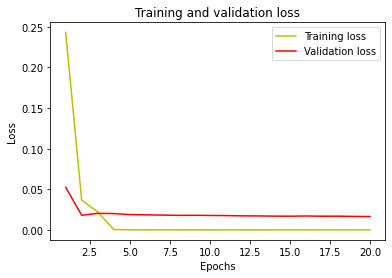

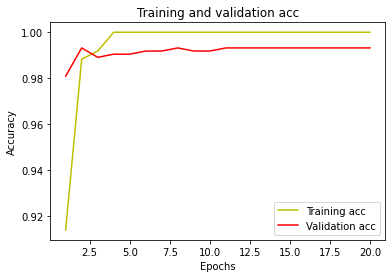

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,'y',label='Training acc')
plt.plot(epochs,val_loss,'r',label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
bcc, acc = model.evaluate(x_test, y_test)
print("Accuracy = ",(acc * 100.0),"%")
print(("Accuracy = ",(bcc * 100.0),"%"))

23/23 [==============================] - 1s 58ms/step - loss: 0.0165 - accuracy: 0.9932
Accuracy =  99.31787252426147 %
('Accuracy = ', 1.6483793035149574, '%')


[[0.9999989]]
This Leaf is 99.9998931885 percent Healthy and 0.0001072884 percent Diseased.


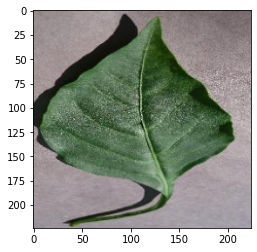

In [ ]:
n = np.random.randint(0, len(random_tests))
img = random_tests[n]
plt.imshow(img)
preprocessed_img = preprocess_input(img)
input_img = np.expand_dims(preprocessed_img, axis=0)
score = model.predict(input_img)
print(score)
print(
    "This Leaf is %.10f percent Healthy and %.10f percent Diseased."
    % (100 * (score), 100 *(1- score))
)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[294   0]
 [  5 434]]


0.9931879410857524

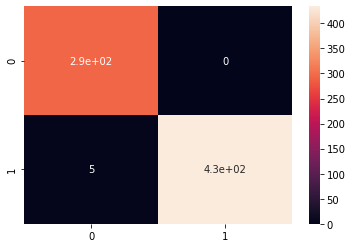

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
import seaborn as sns

prediction = model.predict_classes(x_test)

y_pred = prediction.flatten()
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot = True)
f1_score(y_test, y_pred, average = 'weighted')

ResNet50: ROC AUC=0.994


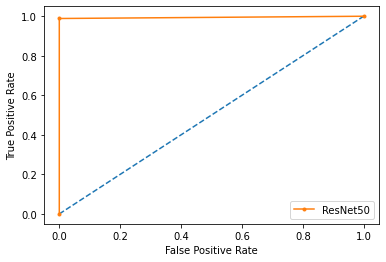

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
# predict probabilities
# keep probabilities for the positive outcome only
from sklearn.metrics import roc_auc_score, roc_curve
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores
# print('Center: ROC AUC=%.3f' % (ns_auc))
print('ResNet50: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='ResNet50')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()